<a href="https://colab.research.google.com/github/Saptarshi-iitbhu/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks :

* Tokenizing the string
* Lowercasing
* Removing stopwords and punctuations
* Stemming
* Sequential Modeling

In [ ]:
import pandas as pd
import numpy as np
from string import punctuation
import re
import nltk
from nltk.corpus import twitter_samples
import random
nltk.download('stopwords')
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.shape

(162980, 2)

In [ ]:
df.isnull().sum()

,0
clean_text,4
category,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
df['clean_text']=df['clean_text'].astype('str')
df.head(10)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [ ]:
df.dropna(inplace=True)
df.shape

(162973, 2)

In [ ]:
duplicated = df.duplicated().sum()
print("Number of duplicated rows:", duplicated)

Number of duplicated rows: 1


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(162972, 2)

# ***Data Visualization***

In [ ]:
from operator import ne
positive_tweets = df[df['category'] == 1]
negative_tweets = df[df['category'] == -1]
neutral_tweets = df[df['category'] == 0]

<Axes: xlabel='category', ylabel='count'>

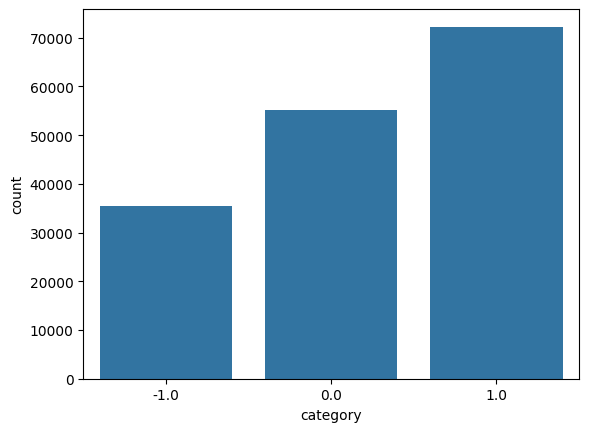

In [ ]:
sns.countplot(x='category', data=df)

In [ ]:
df.category.value_counts()

,count
category,
1.0,72250
0.0,55212
-1.0,35510


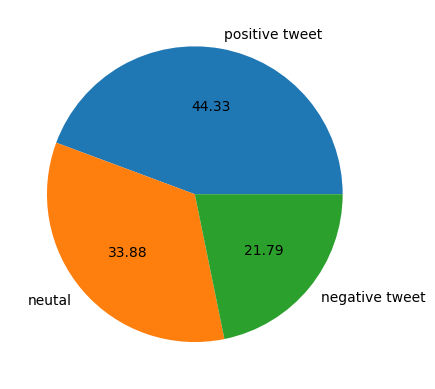

In [ ]:
plt.pie(df['category'].value_counts() , labels = ['positive tweet' , 'neutal', 'negative tweet'] , autopct='%0.2f')
plt.show()

In [ ]:
total_positive_words = []
for sentence in positive_tweets:
    total_positive_words.append(sentence.count(' '))

total_negative_words = []
for sentence in negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in neutral_tweets:
    total_neutral_words.append(sentence.count(' '))

import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name = 'Positive'))
fig.add_trace(go.Histogram(x=x2, name = 'Neutral'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
total_negative_words = []
for sentence in negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in neutral_tweets:
    total_neutral_words.append(sentence.count(' '))

import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x1, name = 'Negative'))
fig.add_trace(go.Histogram(x=x2, name = 'Neutral'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['no_of_characters'] = df['clean_text'].apply(len)
df['no_of_words'] = df['clean_text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['no_of_sentences'] = df['clean_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,clean_text,category,no_of_characters,no_of_words,no_of_sentences
0,when modi promised “minimum government maximum...,-1.0,210,35,1
1,talk all the nonsense and continue all the dra...,0.0,68,13,1
2,what did just say vote for modi welcome bjp t...,1.0,117,22,1
3,asking his supporters prefix chowkidar their n...,1.0,212,34,1
4,answer who among these the most powerful world...,1.0,81,14,1


In [ ]:
arr = ['no_of_characters', 'no_of_words', 'no_of_sentences']
df[arr].describe()

,no_of_characters,no_of_words,no_of_sentences
count,162972.000000,162972.000000,162972.000000
mean,124.176092,20.218553,0.999994
std,67.925394,10.936970,0.002477
min,1.000000,0.000000,0.000000
25%,66.000000,11.000000,1.000000
50%,114.000000,19.000000,1.000000
75%,183.000000,29.000000,1.000000
max,274.000000,52.000000,1.000000


In [ ]:
df[df['category']==1][arr].describe()

,no_of_characters,no_of_words,no_of_sentences
count,72250.000000,72250.000000,72250.0
mean,139.989993,22.797218,1.0
std,66.128326,10.654570,0.0
min,3.000000,1.000000,1.0
25%,84.000000,14.000000,1.0
50%,138.000000,22.000000,1.0
75%,200.000000,32.000000,1.0
max,274.000000,50.000000,1.0


In [ ]:
df[df['category']==0][arr].describe()

,no_of_characters,no_of_words,no_of_sentences
count,55212.000000,55212.000000,55212.000000
mean,88.252373,14.392940,0.999982
std,57.088288,9.135563,0.004256
min,1.000000,0.000000,0.000000
25%,45.000000,8.000000,1.000000
50%,73.000000,12.000000,1.000000
75%,118.000000,19.000000,1.000000
max,267.000000,52.000000,1.000000


In [ ]:
df[df['category']==-1][arr].describe()

,no_of_characters,no_of_words,no_of_sentences
count,35510.000000,35510.000000,35510.0
mean,147.855787,24.029738,1.0
std,64.300828,10.364723,0.0
min,3.000000,1.000000,1.0
25%,93.000000,15.000000,1.0
50%,149.000000,24.000000,1.0
75%,207.000000,33.000000,1.0
max,271.000000,51.000000,1.0


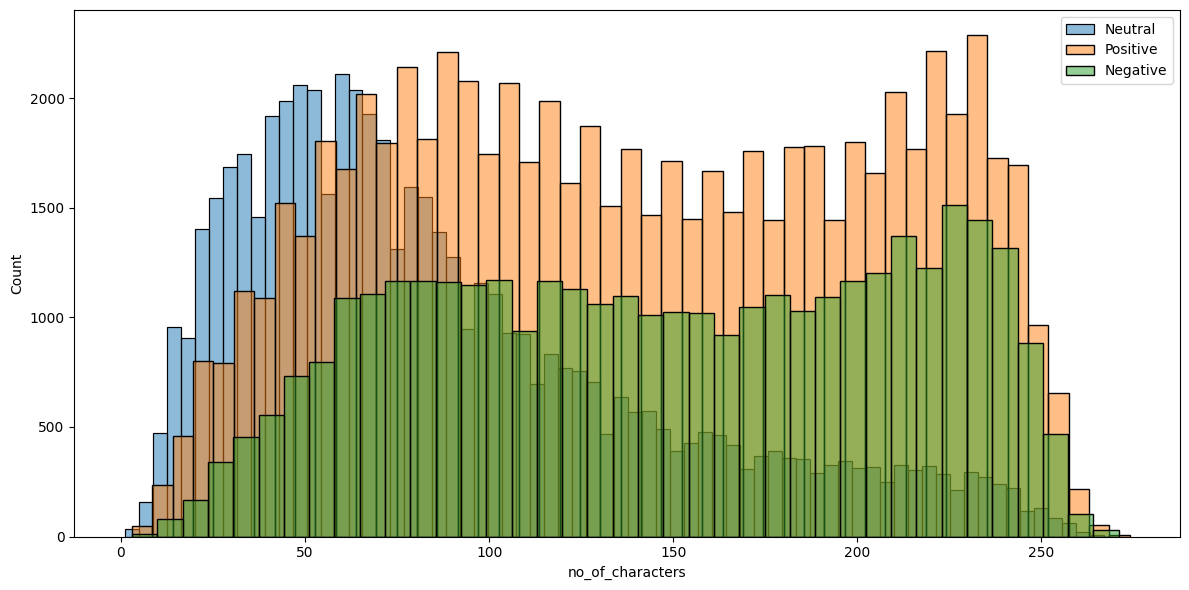

In [ ]:
plt.figure(figsize=(12,6))

# Ensure you have valid values in clean_text
sns.histplot(df[df.category==0]['no_of_characters'], alpha=0.5)
sns.histplot(df[df.category==1]['no_of_characters'], alpha=0.5)
sns.histplot(df[df.category==-1]['no_of_characters'], alpha=0.5)

# Add legend for claritya
plt.legend(['Neutral', 'Positive', 'Negative'])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

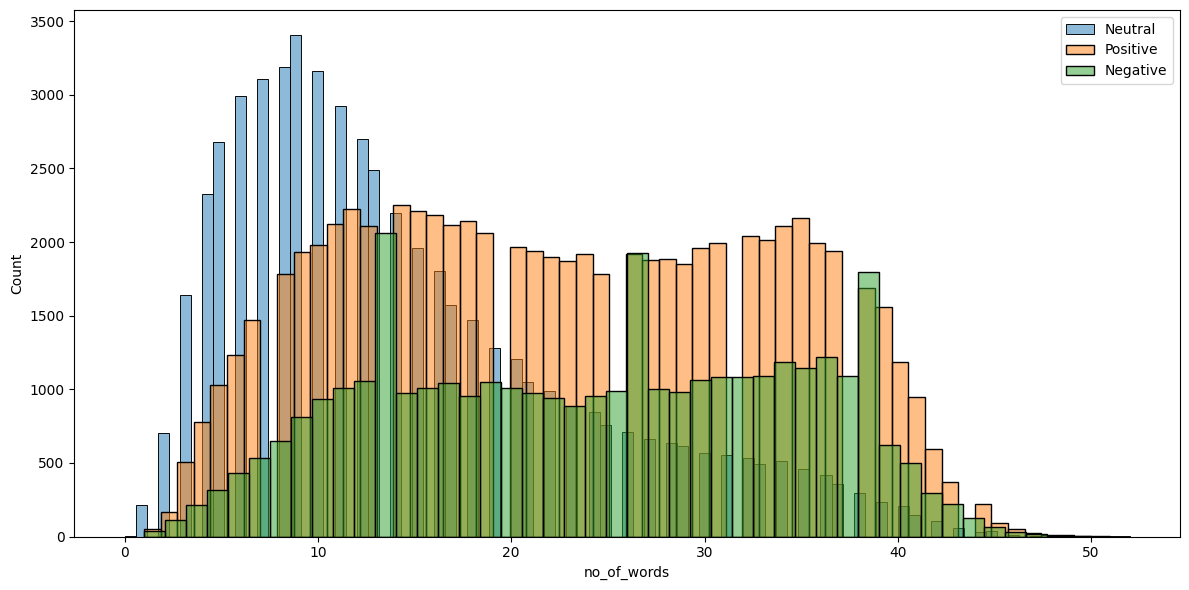

In [ ]:
plt.figure(figsize=(12,6))

# Ensure you have valid values in clean_text
sns.histplot(df[df.category==0]['no_of_words'], alpha=0.5)
sns.histplot(df[df.category==1]['no_of_words'], alpha=0.5)
sns.histplot(df[df.category==-1]['no_of_words'], alpha=0.5)

# Add legend for claritya
plt.legend(['Neutral', 'Positive', 'Negative'])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

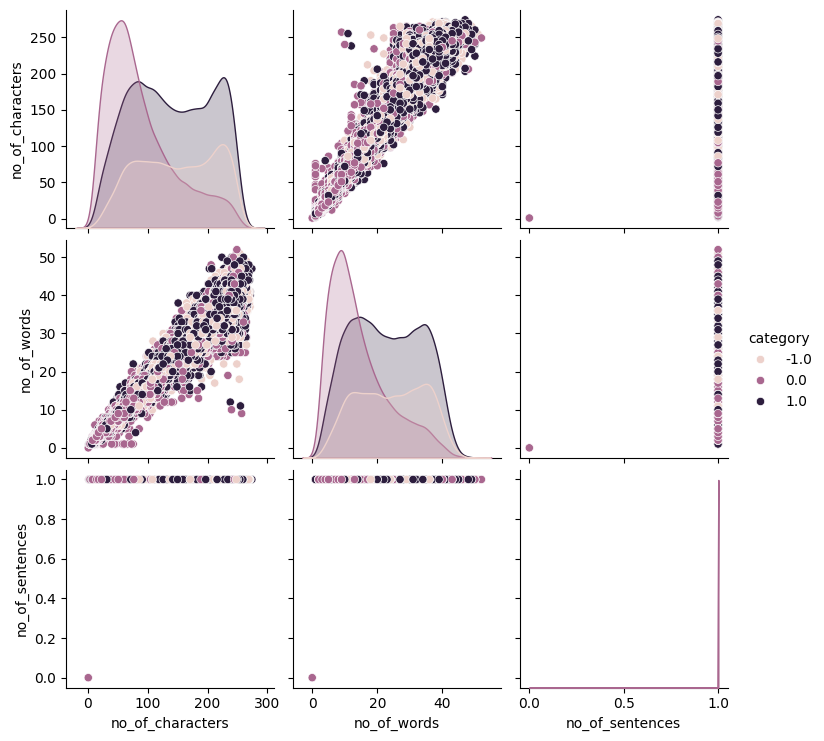

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='category')

<Axes: >

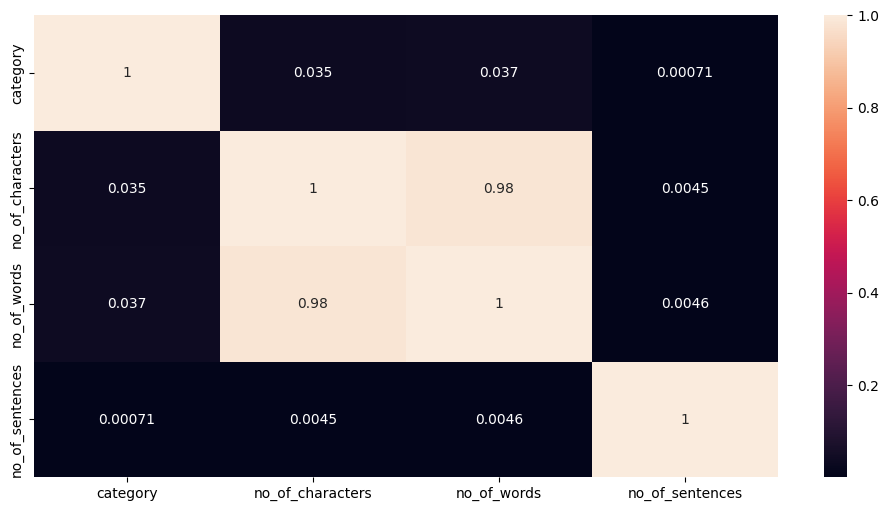

In [ ]:
# Calculate the correlation matrix only for numerical columns.
arr1 = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12,6))
sns.heatmap(arr1,annot=True)

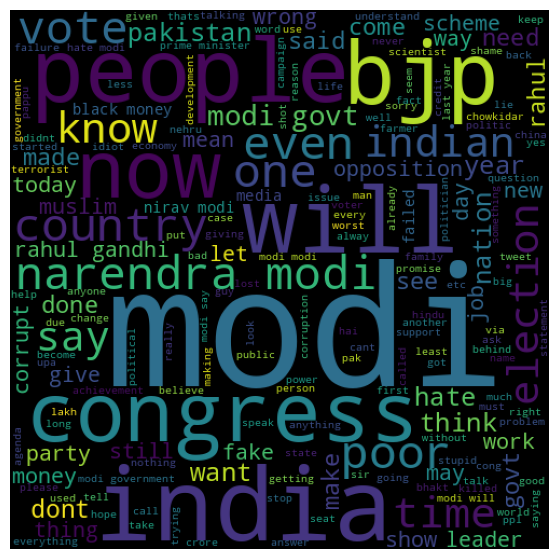

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
positive_wc = wc.generate(df[df['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(df[df['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(df[df['category'] == -1.0]['clean_text'].str.cat(sep = " "))
plt.figure(figsize = (10, 7))
plt.axis('off')
plt.imshow(positive_wc)

# **Data Preprocessing**

* LowerCase
* Tokenizing
* Remove Special Characters
* Removing stopwords and punctuations
* Stemming

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print('Stop words\n')
print(stopwords)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [64]:
def transform(text):
  text = text.lower() # converting every characters to lower case
  text = nltk.word_tokenize(text) # tokenizing all the words in the text

  # removing the special characters from the text
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  return " ".join(text)

In [67]:
df['clean_text'] = df['clean_text'].apply(transform)

In [68]:
 df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [69]:
df['clean_text'][0]

'modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples'

In [70]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stemming (text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

df['clean_text'] = df['clean_text'].apply(lambda x:stemming(x))

In [71]:
df['category'] = [2 if x == -1 else x for x in df['category']]

In [72]:
df

,clean_text,category,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,modi promis minimum govern maximum govern expe...,2.0,210,35,1,modi promised minimum government maximum gover...
1,talk nonsens continu drama vote modi,0.0,68,13,1,talk nonsense continue drama vote modi
2,say vote modi welcom bjp told rahul main campa...,1.0,117,22,1,say vote modi welcome bjp told rahul main camp...
3,ask support prefix chowkidar name modi great s...,1.0,212,34,1,asking supporters prefix chowkidar names modi ...
4,answer among power world leader today trump pu...,1.0,81,14,1,answer among powerful world leader today trump...
...,...,...,...,...,...,...
162975,456 crore paid neerav modi recov congress lead...,2.0,108,18,1,456 crores paid neerav modi recovered congress...
162976,dear rss terrorist payal gawar modi kill 1000 ...,2.0,248,36,1,dear rss terrorist payal gawar modi killing 10...
162977,cover interact forum left,0.0,51,9,1,cover interaction forum left
162978,big project came india modi dream project happ...,0.0,77,13,1,big project came india modi dream project happ...


# **Tokenizing the words**

In [73]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.clean_text)
word_index = tokenizer.word_index

In [74]:
import pickle

# saving
with open('tokenizer1.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer1.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [75]:
df.clean_text

,clean_text
0,modi promis minimum govern maximum govern expe...
1,talk nonsens continu drama vote modi
2,say vote modi welcom bjp told rahul main campa...
3,ask support prefix chowkidar name modi great s...
4,answer among power world leader today trump pu...
...,...
162975,456 crore paid neerav modi recov congress lead...
162976,dear rss terrorist payal gawar modi kill 1000 ...
162977,cover interact forum left
162978,big project came india modi dream project happ...


In [76]:
positive_corpus = []
for msg in df[df['category'] == 1]['clean_text'].tolist():
    for word in msg.split():
        positive_corpus.append(word)

neutral_corpus = []
for msg in df[df['category'] == 0]['clean_text'].tolist():
    for word in msg.split():
        neutral_corpus.append(word)

negative_corpus = []
for msg in df[df['category'] == 2]['clean_text'].tolist():
    for word in msg.split():
        negative_corpus.append(word)

In [77]:
len(positive_corpus)

1161112

In [78]:
from collections import Counter
df1=pd.DataFrame(Counter(positive_corpus).most_common(30))
df1

,0,1
0,modi,73864
1,india,17052
2,bjp,7265
3,peopl,7214
4,elect,6611
5,like,6525
6,vote,5959
7,congress,5825
8,nation,5691
9,narendra,5530


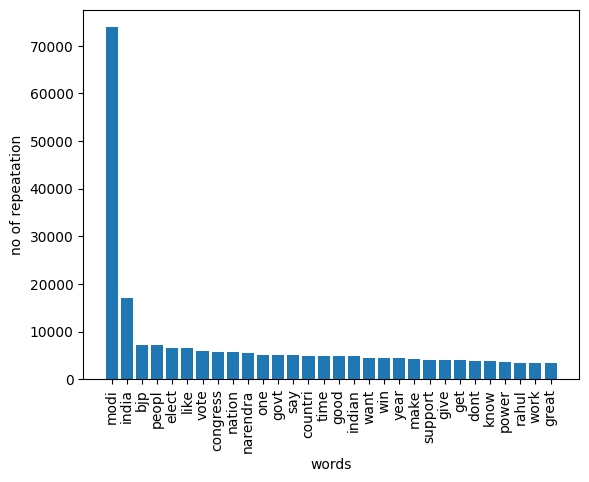

In [79]:
plt.bar(df1[0],df1[1])
plt.xlabel('words')
plt.ylabel('no of repeatation')
plt.xticks(rotation='vertical')
plt.show()

In [80]:
df2=pd.DataFrame(Counter(neutral_corpus).most_common(30))
df2

,0,1
0,modi,52431
1,india,7192
2,bjp,4109
3,narendra,4016
4,vote,3896
5,congress,3567
6,elect,3519
7,say,3423
8,like,3258
9,peopl,2973


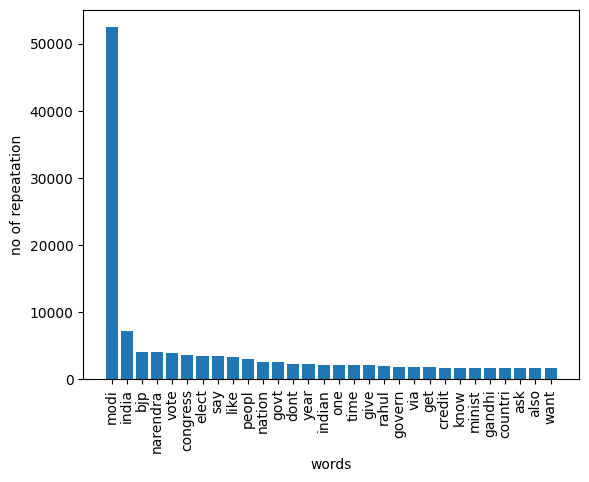

In [81]:
plt.bar(df2[0],df2[1])
plt.xlabel('words')
plt.ylabel('no of repeatation')
plt.xticks(rotation='vertical')
plt.show()

In [82]:
df3=pd.DataFrame(Counter(negative_corpus).most_common(30))
df3

,0,1
0,modi,36965
1,india,6719
2,peopl,4234
3,bjp,3710
4,like,3652
5,congress,3447
6,govt,2814
7,say,2802
8,poor,2681
9,vote,2654


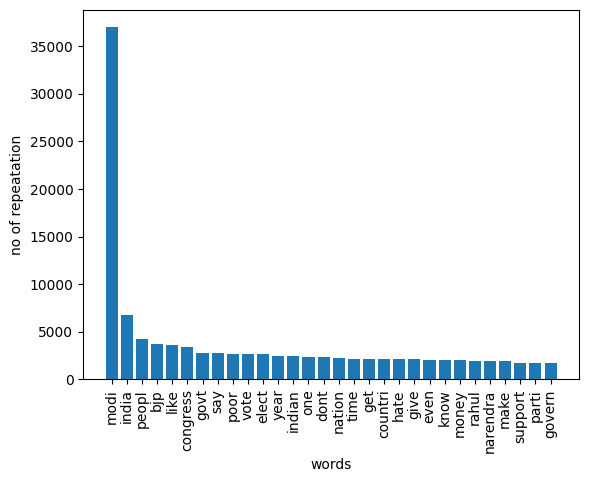

In [83]:
plt.bar(df3[0],df3[1])
plt.xlabel('words')
plt.ylabel('no of repeatation')
plt.xticks(rotation='vertical')
plt.show()

# **Padding the tweet**

In [84]:
max_length = 200
lines = pad_sequences(tokenizer.texts_to_sequences(df.clean_text),
                        maxlen = max_length)

In [85]:
df.clean_text = lines.tolist()

In [86]:
df.clean_text

,clean_text
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
162975,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
162976,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
162977,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
162978,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [89]:
vocab_size = len(word_index)+1

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['clean_text'],df['category'],test_size=0.2,random_state=101)
X_train = np.vstack(X_train.values)
y_train = np.vstack(y_train.values)

X_val = np.vstack(X_test.values)
y_val = np.vstack(y_test.values)

In [90]:
model = tf.keras.Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(input_dim=vocab_size,output_dim=200,trainable=True))

# LSTM layer
model.add(LSTM(64, activation='relu'))

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 200)           │      17,578,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          67,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,650,395 (67.33 MB)

 Trainable params: 17,650,395 (67.33 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=5, batch_size=512,
                    verbose=1,shuffle=True,validation_data=(X_val,y_val))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



255/255 ━━━━━━━━━━━━━━━━━━━━ 484s 2s/step - accuracy: 0.5546 - loss: 3.8562 - val_accuracy: 0.7904 - val_loss: 0.5495
Epoch 2/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.8471 - loss: 0.4280 - val_accuracy: 0.8377 - val_loss: 0.4467
Epoch 3/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 0.9002 - loss: 0.2995 - val_accuracy: 0.8351 - val_loss: 0.4634
Epoch 4/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.9169 - loss: 0.2597 - val_accuracy: 0.8311 - val_loss: 0.4882
Epoch 5/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - accuracy: 0.9298 - loss: 0.2166 - val_accuracy: 0.8274 - val_loss: 0.5210


In [92]:
from keras.models import load_model
model.save("model_lstm.h5")

# **Accuracy and Loss on Test Data**

In [93]:
predictions = model.predict(X_val)
print(history.history)

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 69s 67ms/step
{'accuracy': [0.6461262106895447, 0.8551048040390015, 0.8954493403434753, 0.9146398305892944, 0.9269809722900391], 'loss': [1.8762067556381226, 0.4087561368942261, 0.31883543729782104, 0.2614002823829651, 0.2217978835105896], 'val_accuracy': [0.7904279828071594, 0.8376744985580444, 0.8350667357444763, 0.8310784101486206, 0.8273661732673645], 'val_loss': [0.5495496392250061, 0.4467460513114929, 0.46342864632606506, 0.4881565272808075, 0.5210169553756714]}


In [94]:
predictions.shape

(32595, 3)

# **Model Evaluation**

In [95]:
print("Evaluate on test data")
results = model.evaluate(X_val, y_val, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
255/255 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - accuracy: 0.8285 - loss: 0.5195
test loss, test acc: [0.5210168361663818, 0.8273661732673645]


# **Accuracy is 83%**